In [1]:
# Supress Warning

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score



In [3]:
# Read the Data set

bike = pd.read_csv("C:\\Users\\Hp\\Downloads\\day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the shape

bike.shape

(730, 16)

In [5]:
# understanding each colum

bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# Summary of the dataset : 730 Rows, 16 Columns, no null values

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Getting insight of the features

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# renaming few columns for better readibility

bike.rename(columns = {'yr' : 'year' , 'mnth' : 'month' , 'hum' : 'humidity'} , inplace = True)

In [9]:
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
bike[['season']] = bike[['season']].apply (lambda x: x.map ({1:'spring' , 2 : 'summer' , 3 : 'fall' , 4 : 'winter'}))

In [11]:
bike['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
bike[['month']] = bike[['month']]. apply (lambda x: x.map ({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}))

In [13]:
bike['month'].value_counts()

aug     62
dec     62
may     62
mar     62
oct     62
july    62
jan     62
sep     60
june    60
apr     60
nov     60
feb     56
Name: month, dtype: int64

In [14]:
bike.weathersit.replace({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'},inplace = True)
bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
# Droping instant column as it is index column which has nothing to do with target
bike.drop(['instant'] , axis = 1 , inplace= True)

# Dropping dteday as we have already have month and weekday columns to work with
bike.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

In [16]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [18]:
bike.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Visualizing the Data

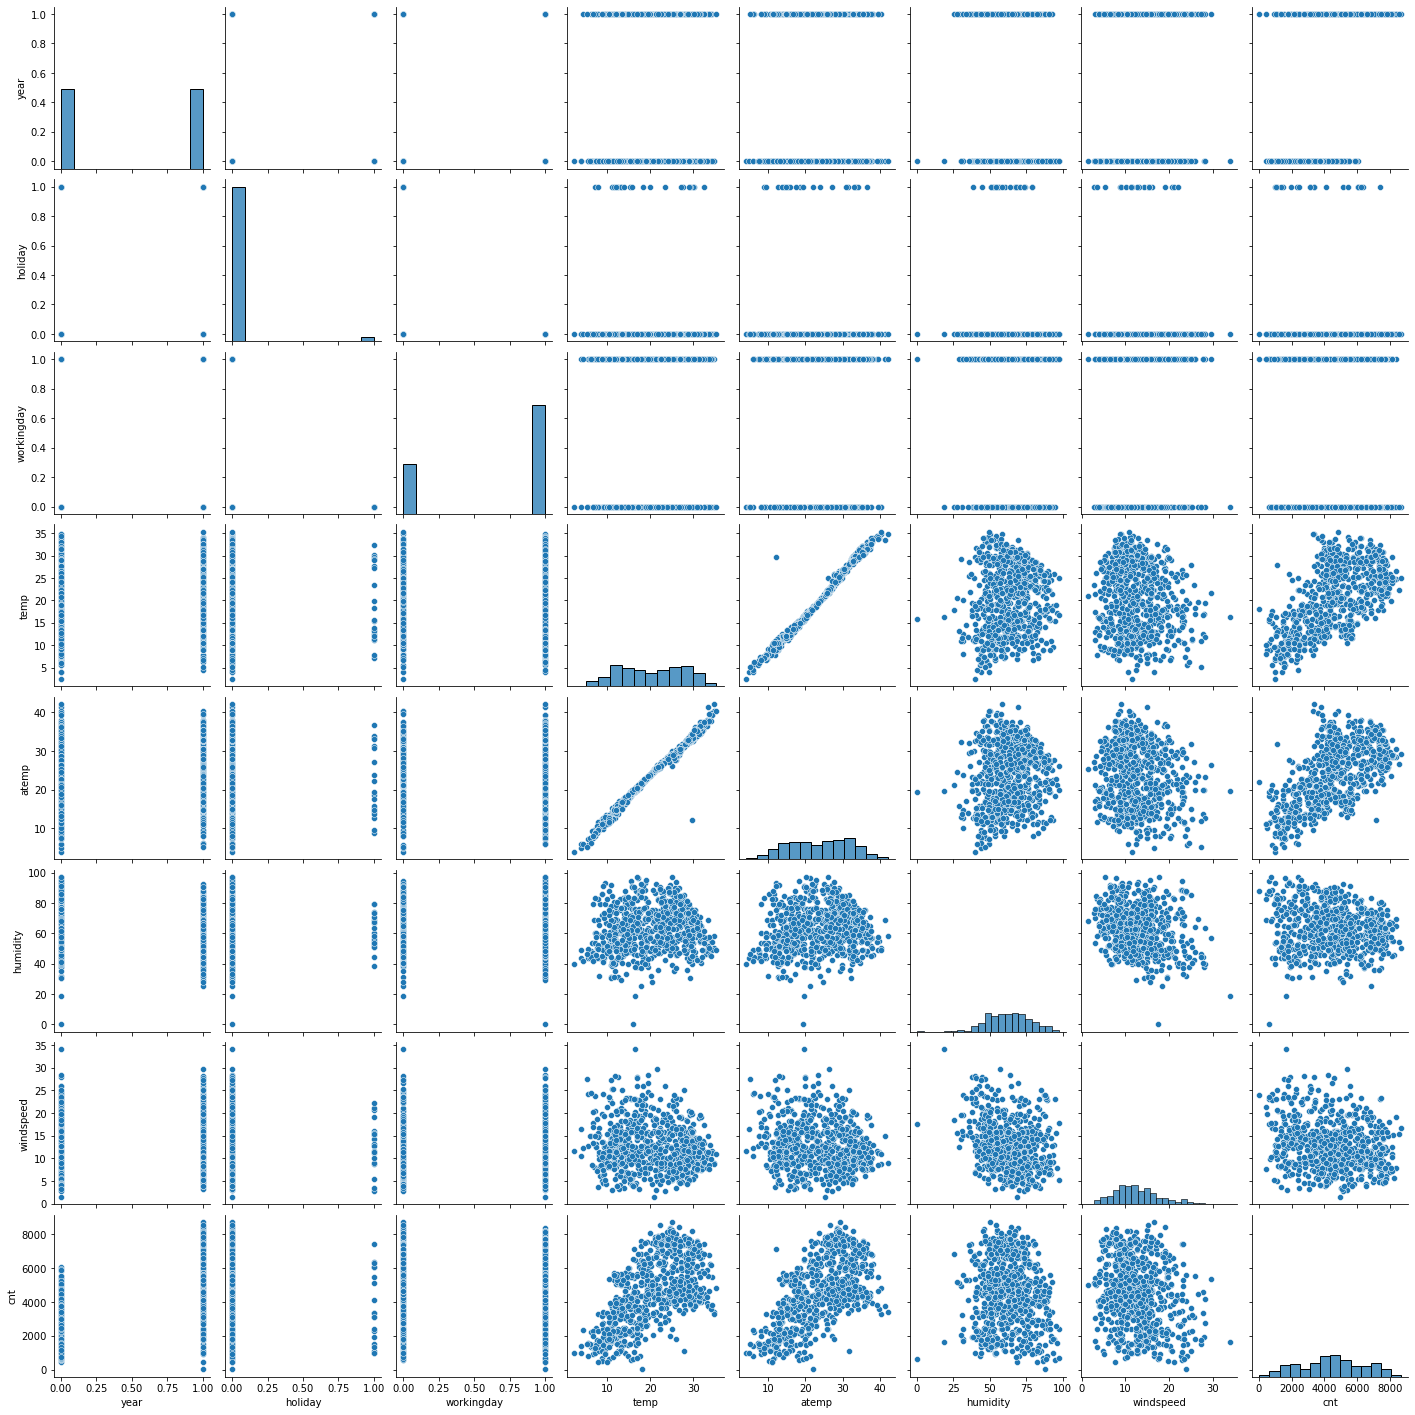

In [19]:
# Visualize Numerical Veriable
sns.pairplot(bike)
plt.show()

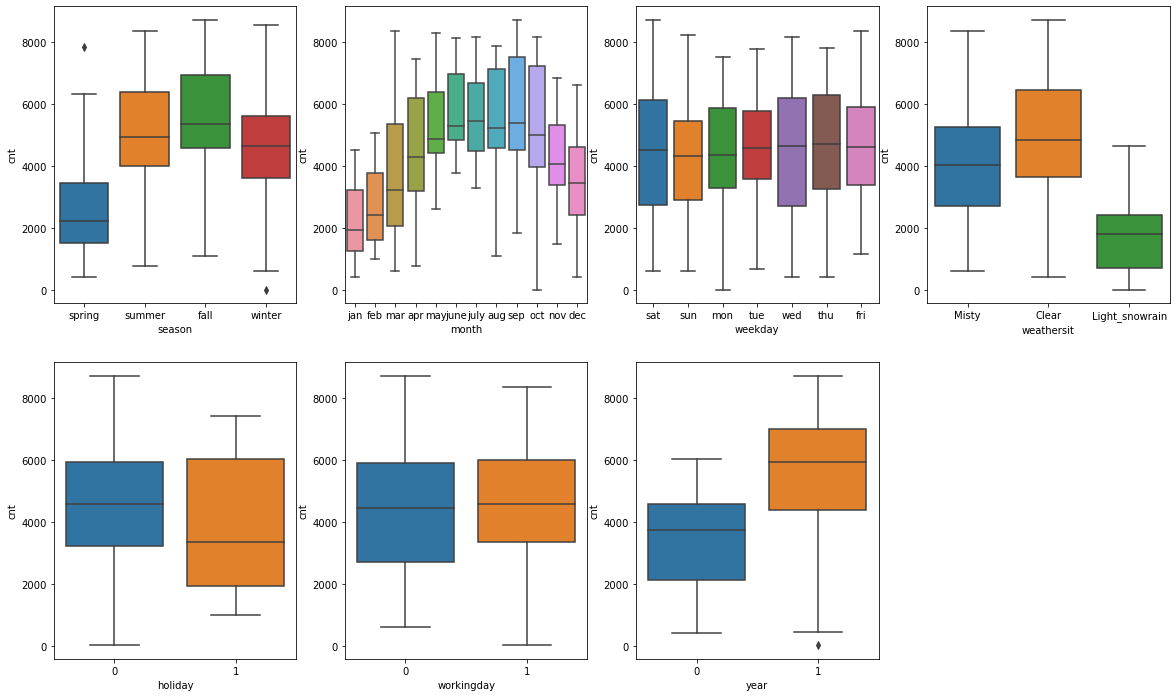

In [20]:
# Visualizing Categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike)
plt.show()

In [21]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bike, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

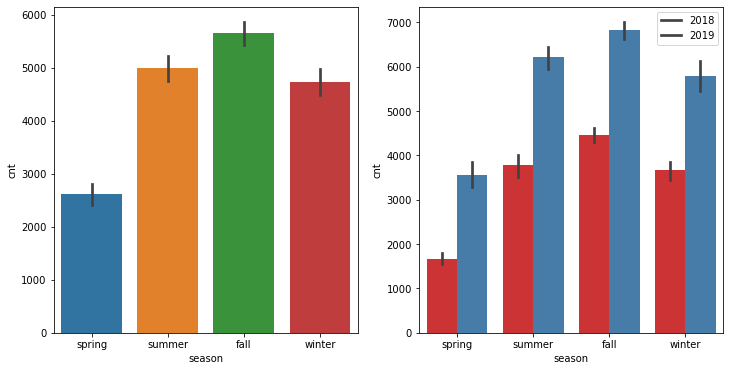

In [22]:
# plotting visualization for season column

plot_cat_columns('season')

### Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

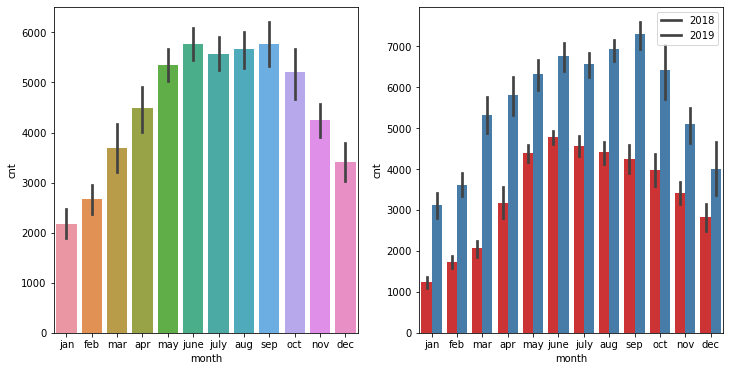

In [23]:
# plotting visualization for month column

plot_cat_columns('month')

### Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

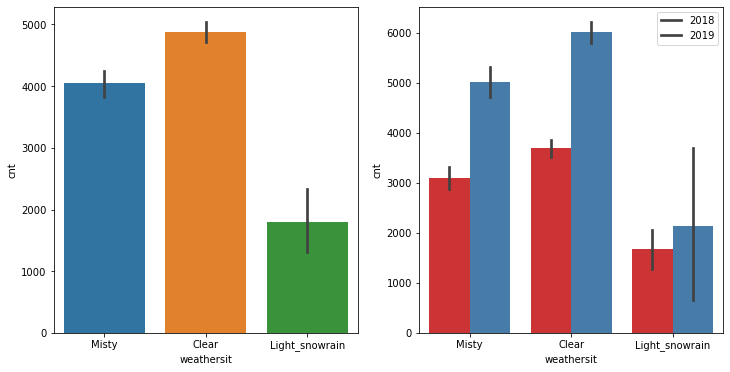

In [24]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

### Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

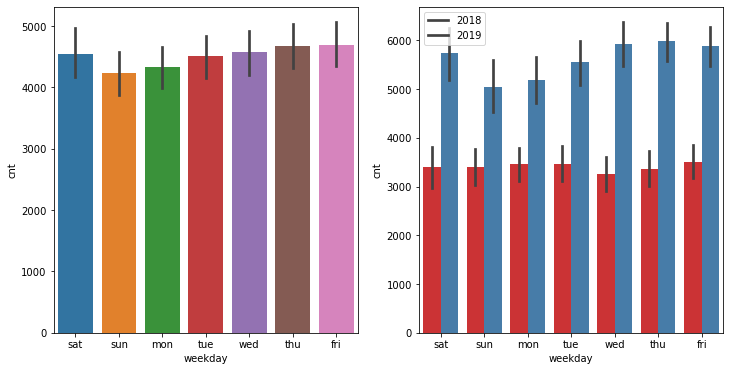

In [25]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

### Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

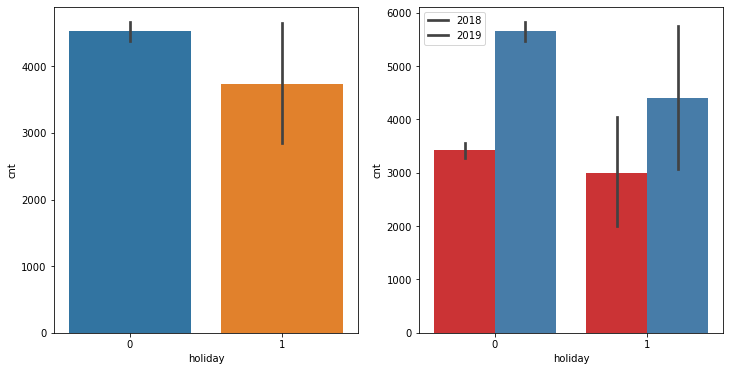

In [26]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

### When its holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

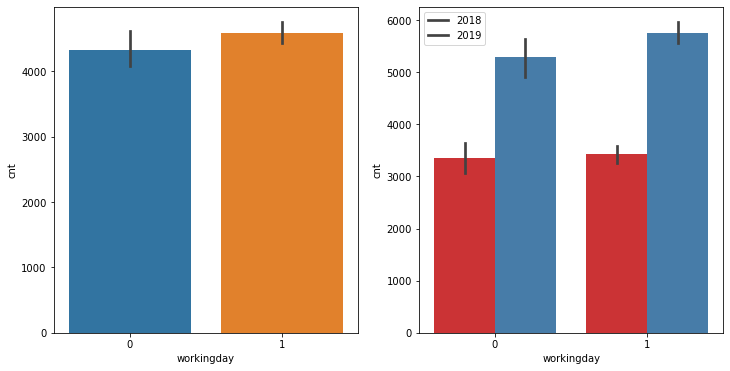

In [27]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

### Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

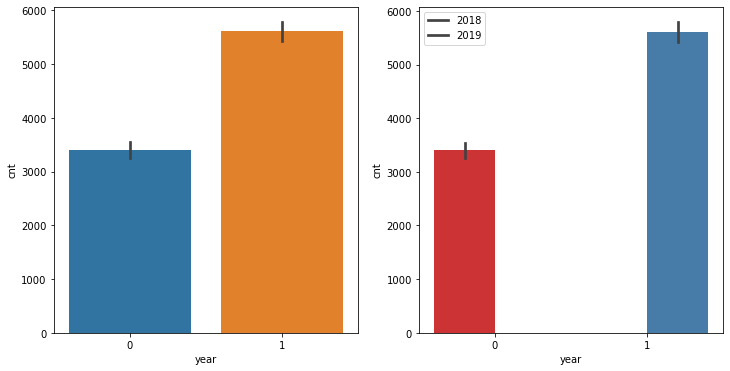

In [28]:
# plotting visualization for year column

plot_cat_columns('year')

### 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

<Figure size 1080x2160 with 0 Axes>

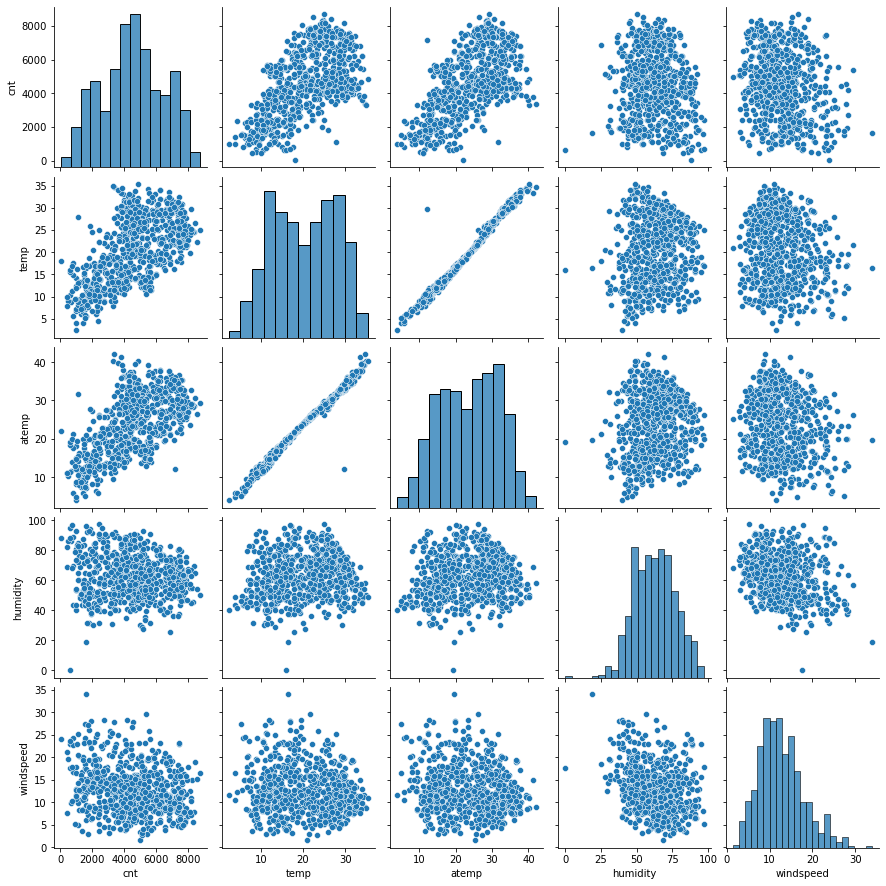

In [29]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike ,vars=['cnt', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

In [30]:
bike.dtypes

season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
humidity      float64
windspeed     float64
cnt             int64
dtype: object

In [31]:
bike.corr()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
year,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


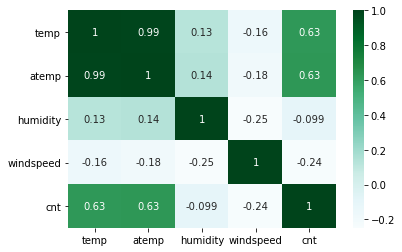

In [32]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[['temp','atemp','humidity','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

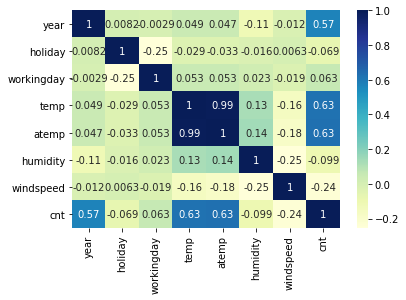

In [33]:
#Correlations for numeric variables
cor=bike.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

###  There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables.

# Data Preparation

In [34]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bike.month,drop_first=True)
weekdays_df=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike.weathersit, drop_first = True)
seasons_df=pd.get_dummies(bike.season,drop_first=True)

In [35]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
# Merging  the dataframe, with the dummy variable dataset. 

bike_new = pd.concat([bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [37]:
bike_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [38]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [39]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [40]:
bike_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [41]:
# check the shape of new dataframe

bike_new.shape

(730, 30)

In [42]:
# check the column info of new dataframe 

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

# Splitting the Data into Training and Testing Sets

In [43]:
# splitting the dataframe into Train and Test

df_train, df_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [44]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [45]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [46]:
df_train[num_vars].describe()

,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


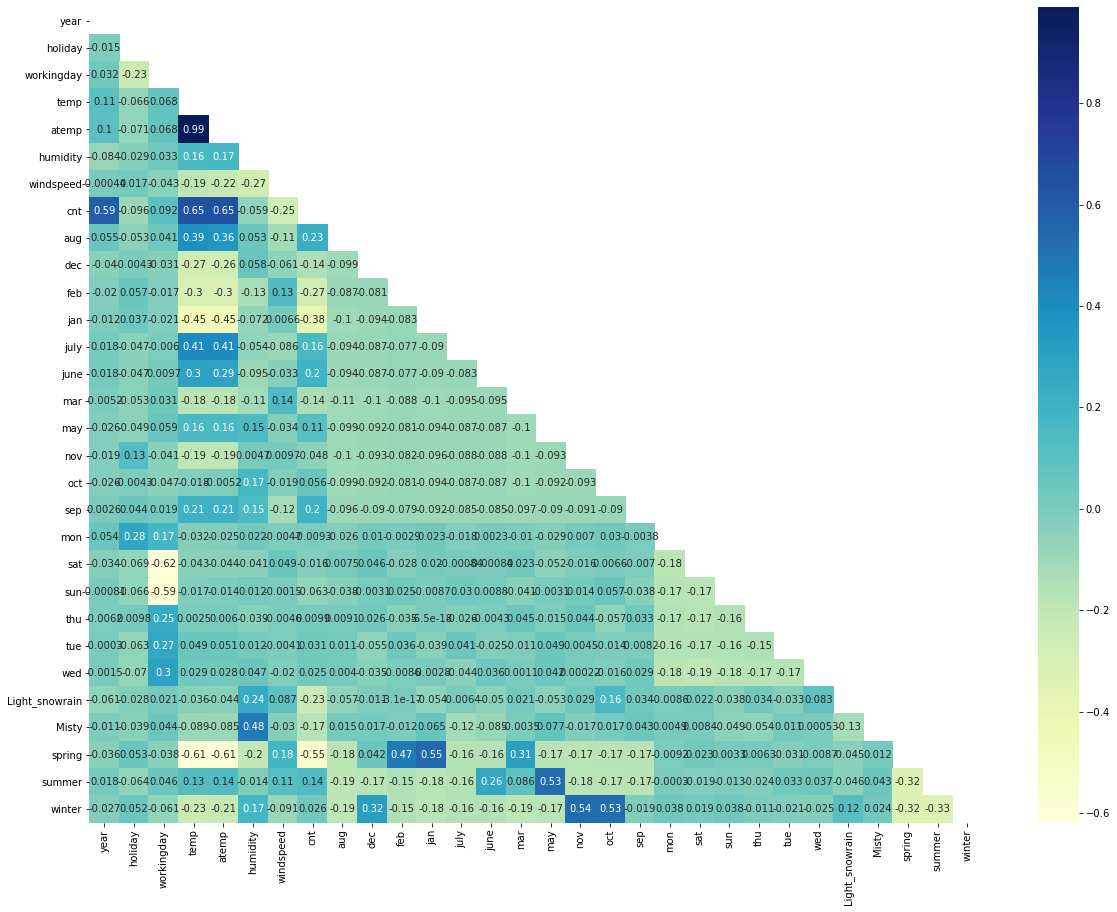

In [47]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize= (20 ,15))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True , cmap = "YlGnBu", mask=matrix)
plt.show()

### cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

In [48]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [49]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [50]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [51]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [52]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [53]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 11),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 7),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1)]

In [54]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty',
       'spring', 'winter'],
      dtype='object')


In [55]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [56]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [57]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [58]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,temp,52.82
4,atemp,51.48
2,workingday,40.81
9,sat,9.96
10,sun,9.67
13,spring,2.55
1,holiday,2.54
5,humidity,1.90
14,winter,1.79
12,Misty,1.57


### temp show high VIF

# Building a linear model

In [59]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          8.89e-189
Time:                        21:07:25   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2422      0.025      9.

In [60]:
# We can drop holiday variable as it has high p-value
X_train_new= X_train_rfe.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,atemp,352.34
2,temp,351.00
4,humidity,29.43
1,workingday,17.00
5,windspeed,4.65
8,sat,4.58
9,sun,4.47
12,spring,2.79
11,Misty,2.28
13,winter,2.16


VIF gets much affected after dropping few of the variables. Lets proceed more to observe better model.

In [61]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          8.89e-189
Time:                        21:07:25   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2347      0.040      5.

In [62]:
# We can drop atemp variable as it has high p-value & high VIF value
X_train_new= X_train_new.drop(['atemp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,29.19
2,temp,17.25
1,workingday,16.91
7,sat,4.57
4,windspeed,4.52
8,sun,4.45
11,spring,2.79
10,Misty,2.28
12,winter,2.14
0,year,2.08


In [63]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          9.38e-190
Time:                        21:07:25   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2355      0.040      5.

In [64]:
# We can drop humidity variable as it has high VIF value
X_train_new= X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
6,sat,3.77
7,sun,3.54
10,spring,2.44
0,year,2.07
11,winter,1.78
9,Misty,1.58
4,july,1.37


In [65]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.26e-187
Time:                        21:07:25   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1553      0.035      4.

In [66]:
# We can drop working variable as it has high VIF value
X_train_new= X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.72
2,windspeed,4.04
0,year,2.06
9,spring,1.66
8,Misty,1.52
10,winter,1.41
3,july,1.35
5,sat,1.22
6,sun,1.21
4,sep,1.20


In [67]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.84e-185
Time:                        21:07:25   Log-Likelihood:                 495.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     498   BIC:                            -915.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2558      0.024     10.

In [68]:
# We can drop sat variable as it has high p-value
X_train_new= X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,year,2.06
8,spring,1.64
7,Misty,1.52
9,winter,1.40
3,july,1.35
4,sep,1.20
5,sun,1.17
6,Light_snowrain,1.08


In [69]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.75e-186
Time:                        21:07:25   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2586      0.024     10.

## We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

### F-Statistics value of 247.6 (which is greater than 1) and the p-value of 2.75e-186 i.e almost equals to zero, states that the overall model is significant

In [70]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.258592
year              0.234574
temp              0.449323
windspeed        -0.141044
july             -0.069784
sep               0.052198
sun              -0.044329
Light_snowrain   -0.285866
Misty            -0.079670
spring           -0.114692
winter            0.043831
dtype: float64

# Residual Analysis of the train data and validation

In [71]:
X_train_lm_6

,const,year,temp,windspeed,july,sep,sun,Light_snowrain,Misty,spring,winter
576,1.0,1,0.815169,0.264686,1,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,0,0,0,0,1,1,0
728,1.0,1,0.245101,0.663106,0,0,1,0,0,1,0
482,1.0,1,0.395666,0.188475,0,0,0,0,1,0,0
111,1.0,0,0.345824,0.380981,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,0,0,0,0,0,1,0
350,1.0,0,0.248216,0.431816,0,0,0,0,1,0,1
79,1.0,0,0.462664,0.529881,0,0,0,0,1,0,0


In [72]:
X_train_lm_6.columns

Index(['const', 'year', 'temp', 'windspeed', 'july', 'sep', 'sun',
       'Light_snowrain', 'Misty', 'spring', 'winter'],
      dtype='object')

In [73]:
y_train_pred = lr_6.predict(X_train_lm_6)

## Normality of error terms

Text(0.5, 0, 'Errors')

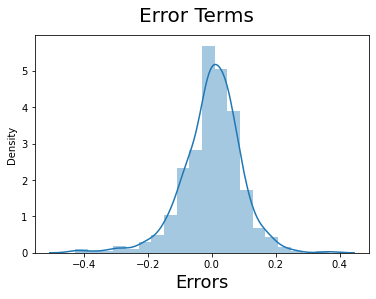

In [74]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

## Multi Colinearity

In [75]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,year,2.06
8,spring,1.64
7,Misty,1.52
9,winter,1.40
3,july,1.35
4,sep,1.20
5,sun,1.17
6,Light_snowrain,1.08


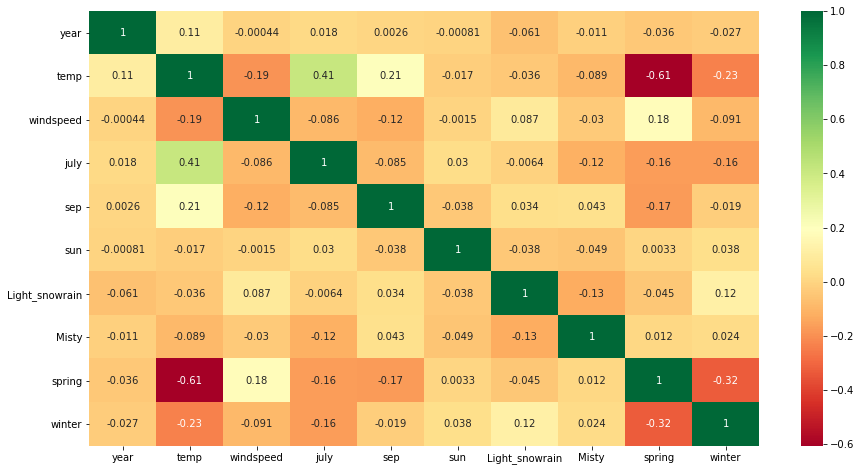

In [76]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

####  VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

## Predictions & Evaluation on the Test Set

In [77]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [78]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)
X_test_lm_6.head()

,const,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,...,0,0,0,0,1,0,0,0,1,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,0,0,1,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,...,0,0,1,0,0,0,0,0,1,0


In [81]:
X_test_lm_6 = X_test_lm_6.drop(['sat', 'workingday', 'humidity', 'atemp', 'holiday','feb','jan','aug','june','mar','dec','may','nov', 'oct','mon','thu','tue','wed','summer'], axis = 1)

In [82]:
X_test_lm_6.columns

Index(['const', 'year', 'temp', 'windspeed', 'july', 'sep', 'sun',
       'Light_snowrain', 'Misty', 'spring', 'winter'],
      dtype='object')

In [83]:
# predict

y_test_pred =lr_6.predict(X_test_lm_6)

In [84]:
# evaluate

r2_score(y_true=y_test, y_pred = y_test_pred)

0.8091992919519853

# Model Evaluation

Text(0, 0.5, 'y_test_pred')

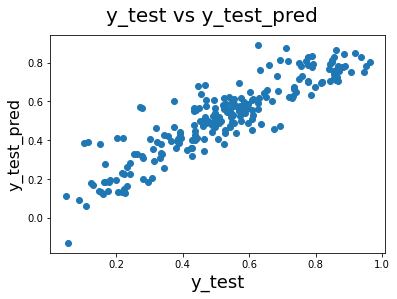

In [85]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

In [86]:
round(lr_6.params,4)

const             0.2586
year              0.2346
temp              0.4493
windspeed        -0.1410
july             -0.0698
sep               0.0522
sun              -0.0443
Light_snowrain   -0.2859
Misty            -0.0797
spring           -0.1147
winter            0.0438
dtype: float64

# We can see that the equation of our best fitted line is:

   𝑐𝑛𝑡=0.2586+0.2346×𝑦𝑒𝑎r+0.4493×𝑡𝑒𝑚𝑝−0.1410×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑+0.0522×𝑠𝑒𝑝-0.0443×sun−0.2859×𝐿𝑖𝑔ℎ𝑡𝑠𝑛𝑜𝑤𝑟𝑎𝑖𝑛−0.0797×𝑀𝑖𝑠𝑡𝑦−0.1147×𝑠𝑝𝑟𝑖𝑛𝑔+0.0438×𝑤𝑖𝑛𝑡𝑒𝑟

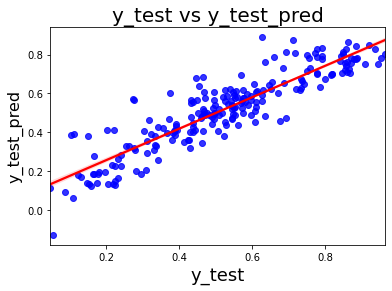

In [87]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()